In [1]:
import sys
sys.path.append('C:/CASA/Workspace/geopandas')
sys.path.append('C:/CASA/Workspace/sfdata_wrangler/sfdata_wrangler')

import geopandas
import geopandas.tools as tools
import pandas as pd
#from DataFrameViewer import DataFrameViewer

#new viewer needs to be pulled from previous notebook
#viewer = DataFrameViewer()

geopandas.__version__

import csv as csv
import pandas as pd
import numpy as np
import folium
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [26]:
hdffile = "E:/Transit_Casa/Output/sfmuni_monthly_ts.h5"
store = pd.HDFStore(hdffile)
#store.items()
#origin = store.select('stop_day')
df = store.select('stop_day', columns = ['STOP_LAT','STOP_LON','STOP_ID','STOPNAME','MONTH'])

In [28]:
df.MONTH.unique()

array(['2009-06-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-09-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177415 entries, 0 to 177414
Data columns (total 5 columns):
STOP_LAT    177415 non-null float64
STOP_LON    177415 non-null float64
STOP_ID     177415 non-null int64
STOPNAME    177415 non-null object
MONTH       177415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 8.1+ MB


In [29]:
mask = (df['MONTH'] >= '2013-10-01') & (df['MONTH'] <= '2013-12-01')

In [30]:
df.loc[mask]

,STOP_LAT,STOP_LON,STOP_ID,STOPNAME,MONTH
170948,37.721190,-122.475096,390,19th Avenue & Holloway St,2013-10-01
170949,37.723914,-122.435387,660,MISSION ST & OCEAN AVENUE,2013-10-01
170950,37.719192,-122.425802,913,DUBLIN ST & LAGRANDE AVE,2013-10-01
170951,37.781827,-122.391945,3003,2nd St & Brannan St,2013-10-01
170952,37.781854,-122.392232,3004,2nd St & Brannan St,2013-10-01
170953,37.782845,-122.393469,3006,2nd St & Bryant St,2013-10-01
170954,37.785318,-122.396562,3008,2nd St & Folsom St,2013-10-01
170955,37.784532,-122.395325,3009,2nd St & Harrison St,2013-10-01
170956,37.784095,-122.395016,3010,2nd St & Harrison St,2013-10-01
170957,37.786559,-122.398109,3011,2nd St & Howard St,2013-10-01


In [65]:
df2 = df[(df['MONTH'] == '2009-11-01')|(df['MONTH'] == '2009-10-01')|(df['MONTH'] == '2009-09-01')]

In [66]:
df2.head()

,STOP_LAT,STOP_LON,STOP_ID,STOPNAME,MONTH
10689,37.721190,-122.475096,390,19th Avenue & Holloway St,2009-09-01
10690,37.765159,-122.477210,392,19TH AVE & LINCOLN WAY,2009-09-01
10691,37.723914,-122.435387,660,MISSION ST & OCEAN AVENUE,2009-09-01
10692,37.719192,-122.425802,913,DUBLIN ST & LAGRANDE AVE,2009-09-01
10693,37.788530,-122.396044,3001,1st St & Howard St,2009-09-01


In [67]:
df2 = df2.groupby(by = 'STOP_ID', as_index = False).mean()

In [68]:
len(df2)

3563

In [70]:
df2.to_csv('E:\Transit-Casa-Alex\Input\Bus_Stops/bus stops_2009.csv')

In [71]:
df2.head()

,STOP_ID,STOP_LAT,STOP_LON
0,390,37.721190,-122.475096
1,392,37.765159,-122.477210
2,660,37.723914,-122.435387
3,913,37.719192,-122.425802
4,3001,37.788530,-122.396044


In [26]:
df2 = df.groupby('STOP_ID').mean()
print(len(df2))
df2['STOP_ID'] = df2.index
df2.head()
#There are 3,744 stops in San Francisco

3744


,STOP_LAT,STOP_LON,STOP_ID
STOP_ID,,,
390,37.721190,-122.475096,390
392,37.765159,-122.477210,392
660,37.723914,-122.435387,660
913,37.719192,-122.425802,913
3001,37.788530,-122.396044,3001


In [27]:
df2.STOP_ID.value_counts().head()

4094    1
4791    1
4819    1
6866    1
6862    1
Name: STOP_ID, dtype: int64

In [9]:
# in the future, select out certain performence measurements that we are going to attach to each stop
df3 = store.select('stop_day', columns = ['STOPNAME','STOP_ID'])
print(len(df3))
df3.head()

177415


,STOPNAME,STOP_ID
0,19th Avenue & Holloway St,390
1,19TH AVE & LINCOLN WAY,392
2,MISSION ST & OCEAN AVENUE,660
3,DUBLIN ST & LAGRANDE AVE,913
4,1st St & Howard St,3001


In [29]:
df2.head()

,STOP_LAT,STOP_LON,STOP_ID
STOP_ID,,,
390,37.721190,-122.475096,390
392,37.765159,-122.477210,392
660,37.723914,-122.435387,660
913,37.719192,-122.425802,913
3001,37.788530,-122.396044,3001


In [30]:
df4 = df3.drop_duplicates()
len(df4)

3795

In [31]:
df4.head()

,STOPNAME,STOP_ID
0,19th Avenue & Holloway St,390
1,19TH AVE & LINCOLN WAY,392
2,MISSION ST & OCEAN AVENUE,660
3,DUBLIN ST & LAGRANDE AVE,913
4,1st St & Howard St,3001


In [10]:
#tried to merge the stop names to the dataframe bu the inner merge is not working properly
df_merge = pd.merge(df2,df4,how = 'inner',on = 'STOP_ID',sort = True)
len(df_merge)

NameError: name 'df4' is not defined

In [33]:
print(df_merge.head())
len(df)

    STOP_LAT    STOP_LON  STOP_ID                    STOPNAME
0  37.721190 -122.475096      390  19th Avenue &  Holloway St
1  37.721190 -122.475096      390   19th Avenue & Holloway St
2  37.765159 -122.477210      392     19TH AVE &  LINCOLN WAY
3  37.723914 -122.435387      660   MISSION ST & OCEAN AVENUE
4  37.719192 -122.425802      913    DUBLIN ST & LAGRANDE AVE


177415

In [45]:
df2.head()

,STOP_ID,STOP_LAT,STOP_LON
0,390,37.721190,-122.475096
1,392,37.765159,-122.477210
2,660,37.723914,-122.435387
3,913,37.719192,-122.425802
4,3001,37.788530,-122.396044


In [11]:
from shapely.geometry import Point
import geopandas as gp
import shapefile

# Creating Point Geometries with Lat and Long from Stop Table

In [72]:
df2['geometry'] = df2.apply(lambda x: Point((float(x.STOP_LON), float(x.STOP_LAT))), axis=1)

In [73]:
df2.head()

,STOP_ID,STOP_LAT,STOP_LON,geometry
0,390,37.721190,-122.475096,POINT (-122.475096 37.72119)
1,392,37.765159,-122.477210,POINT (-122.47721 37.765159)
2,660,37.723914,-122.435387,POINT (-122.435387 37.723914)
3,913,37.719192,-122.425802,POINT (-122.425802 37.719192)
4,3001,37.788530,-122.396044,POINT (-122.396044 37.78853)


In [74]:
stops = gp.GeoDataFrame(df2, geometry='geometry')

In [75]:
stops.head()

,STOP_ID,STOP_LAT,STOP_LON,geometry
0,390,37.721190,-122.475096,POINT (-122.475096 37.72119)
1,392,37.765159,-122.477210,POINT (-122.47721 37.765159)
2,660,37.723914,-122.435387,POINT (-122.435387 37.723914)
3,913,37.719192,-122.425802,POINT (-122.425802 37.719192)
4,3001,37.788530,-122.396044,POINT (-122.396044 37.78853)


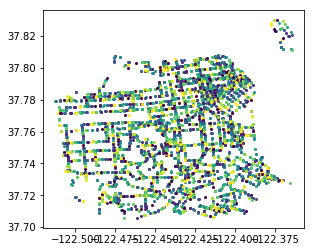

In [76]:
stops.plot()

In [77]:
stops.to_file('Bus_Stops_2009.shp', driver='ESRI Shapefile')

In [78]:
stops.crs = {'init':'epsg:4326'}

In [80]:
stops = gp.read_file('E:\Transit-Casa-Alex\Input\Bus_Stops/Bus_Stops_2009_US.shp')

In [46]:
stops.

RuntimeError: b'no colon in init= string'

## This is another way to write a shapefile (ignore for now)

In [16]:
stop = shapefile.Writer(shapeType = 1)

In [17]:
#makes sure that the shapefile table is balanced every geometry has data vice versa (look up pyshp documentation)
stop.autoBalance = 1

In [18]:
lx = list(df2['STOP_LON'])
ly = list(df2['STOP_LAT'])

for i in range(0,len(df2)):

    stop.point(x = float(lx[i]),y=float(ly[i]))

In [19]:
len(stop.shapes())

3744

In [1]:
len(df2)


NameError: name 'df2' is not defined

In [21]:
stop.save('stops')

## Creating Buffer Code Resumes Here

In [55]:
#reproject the stops onto a NAD83 NSRS 2007California zone 3 map to allow calculations in US ft 

# this did not work at first so I switched to arc gis

stops = stops.to_crs({'init': 'epsg:6420'})

RuntimeError: b'no colon in init= string'

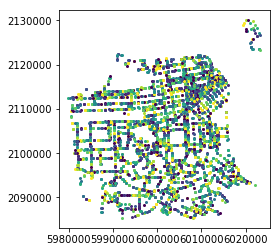

In [81]:
stops.plot()

# Create Buffers Around Bus Stop Points

In [82]:
buffers_third = stops.copy()
buffers_third.geometry = stops.buffer(1760)

In [83]:
buffers_quarter = stops.copy()
buffers_quarter.geometry = stops.buffer(1320)

In [84]:
buffers_tenth = stops.copy()
buffers_tenth.geometry = stops.buffer(528)

In [101]:
buffers_third.to_file('Buffers/Buffers_Third.shp',driver = 'ESRI Shapefile')

In [102]:
buffers_quarter.to_file('Buffers/Buffers_Quarter.shp',driver = 'ESRI Shapefile')

In [103]:
buffers_tenth.to_file('Buffers/Buffers_Tenth.shp',driver = 'ESRI Shapefile')

# Issues with projections and creating buffers with correct untis
#### Used arc map to define projection as GCS_NAD_1983_2011 
#### reprojected to  NAD_1927_StatePlane_California_III_FIPS_0403
#### Created quarter, third, and half mile buffers using the buffer analysis tool

In [94]:
tenth = gp.read_file('Buffers/Buffers_Tenth.shp')

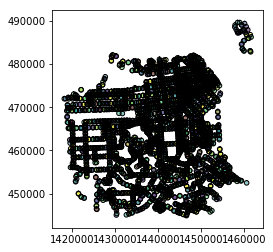

In [28]:
tenth.plot()

In [95]:
third = gp.read_file('Buffers/Buffers_Third.shp')

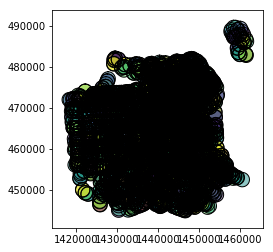

In [26]:
third.plot()

In [96]:
quarter = gp.read_file('Buffers/Buffers_Quarter.shp')

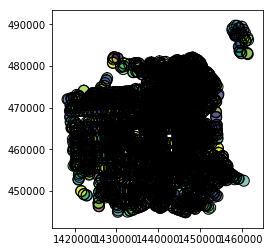

In [28]:
quarter.plot()

In [36]:
import folium
stops_half_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_half_map)

stops_half_map.save('stops_half.html')

In [37]:
stops_third_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_third_map)

stops_third_map.save('stops_third.html')

In [38]:
stops_quarter_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_quarter_map)

stops_quarter_map.save('stops_quarter.html')